In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
INITIAL_PROPELANT_WEIGHT = 0.024  #Kg
SAMPLE_RATE = 2.4
time_constant = 1/SAMPLE_RATE
dataFile = 'Thursday 25 March 2021 01-47PM.csv'

In [3]:
with open(dataFile, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [4]:
a = np.array(data)
a = a.astype(float)
filtered = a[np.where(a > 0.5)]

In [5]:
filtered = np.append(filtered, 0)
filtered = np.insert(filtered, 0, 0)
filtered

array([  0.        ,   0.55118901,   1.09598698,   0.60029097,
         0.61432011,  45.61276131, 316.89876509, 394.65289156,
       176.30815595,  33.84465767,   4.33204011,   0.        ])

In [6]:
filtered = np.delete(filtered, [1,2,3,4,10])
burnTime = filtered.size * time_constant

In [7]:
t = np.linspace(0, burnTime, filtered.size)
thrust = 0.00981 * filtered

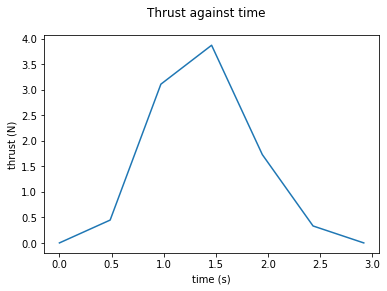

In [8]:
fig = plt.figure()
plt.plot(t, thrust)
fig.suptitle('Thrust against time')
plt.xlabel('time (s)')
plt.ylabel('thrust (N)')
fig.savefig('graph')

In [9]:
#total impulse
totalImpulse = np.sum(thrust) * time_constant
#specific impulse
specificImpulse = totalImpulse / INITIAL_PROPELANT_WEIGHT
#average thrust
avgThrust = totalImpulse / burnTime

In [10]:
def motorClass(totalImpulse):
    if totalImpulse > 5120:
        return 'M'
    elif totalImpulse > 2560:
        return 'L'
    elif totalImpulse > 1280:
        return 'K'
    elif totalImpulse > 640:
        return 'J'
    elif totalImpulse > 320:
        return 'I'
    elif totalImpulse > 160:
        return 'H'
    elif totalImpulse > 80:
        return 'G'
    elif totalImpulse > 40:
        return 'F'
    elif totalImpulse > 20:
        return 'E'
    elif totalImpulse > 10:
        return 'D'
    elif totalImpulse > 5:
        return 'C'
    elif totalImpulse > 2.5:
        return 'B'
    elif totalImpulse > 1.25:
        return 'A'
    elif totalImpulse > 0.625:
        return '1/2A'
    elif totalImpulse > 0.3126:
        return '1/4A'
    else:
        return 'micro'
    
Class = motorClass(totalImpulse)

In [11]:
st = "Total Impulse:\t\t{:.2f}\tN-sec \nSpecific Impulse:\t{:.2f}\tN-sec/Kg \nAverage Thrust:\t\t{:.2f}\tN"
print(st.format(totalImpulse, specificImpulse, avgThrust))
print("Motor Class:\t\t{}".format(Class))

Total Impulse:		3.95	N-sec 
Specific Impulse:	164.75	N-sec/Kg 
Average Thrust:		1.36	N
Motor Class:		B


In [12]:
#Generate Rasp File
filename = input("Enter rasp file name")
filename = filename + ".eng"
f = open(filename, "a")

In [13]:
motorName = Class + str(int(avgThrust))
diameter = input("Enter Motor Diameter (mm): ")
Length = input("Input motor Length (mm): ")
delays = input("Input motor delays separated by dashes or P(plugged) for none: ")
pWeight = input("Propellant Weight (Kg): ")
totalWeight = input("Motor Total Weight (Kg): ")
manufucturer = "NKJ"

In [14]:
#Write rasp file header
f.write("; NakujaProject" + motorName + "\n")
f.write("; from " + dataFile + "\n")
f.write("{} {} {} {} {} {} {} \n".format(motorName, diameter, Length, delays, pWeight, totalWeight, manufucturer))

28

In [15]:
thrustATime = np.array([t, thrust]).T
np.savetxt(f, thrustATime, delimiter=' ')

In [16]:
f.close()